In [17]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
import random
from IPython.display import Image, display

* State - Input Schema for nodes and edges. Basically what the graph remembers
* Node - Basically functions. Each node operates on the state
* Edges - Connect the nodes. Can be conditional or direct

When you define a dictionary in python, on entering a wrong key there will be error during runtime.
TypedDict helps us define the expected structure of a dictionary. 

```
class User(TypedDict):
    name : str
    age : int

dict : User = {
    "name" : "Bruce",
    "age" : 45
}
```

Entering a wrong key like dict["time"] will be automatically flagged by a static type checker.

```
def get_value() -> User:
    return {"name" : "Alice", "age" : 18}
```

You can also use it while returning structured data to let the user know what kind of data is being returned.

# Conditional Routing

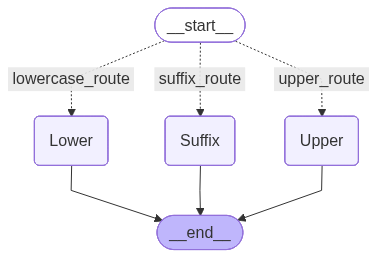

In [19]:
class BasicState(TypedDict): 
    content : str

def uppercase_node(state : BasicState):
    return {"content" : state["content"].upper()}

def lowercase_node(state : BasicState):
    return {"content" : state["content"].lower()}

def suffix_node(state : BasicState):
    return {"content" : state["content"] + "! -- END --"}

def route_random(state : BasicState): #Should return the string name of the next node - Basically randomly choosing which node to go next
    choices = ["upper_route", "lower_route", "suffix_route"]
    return random.choice(choices)

#initialize the graph 
builder = StateGraph(BasicState)

#Add the existing nodes to the graph
builder.add_node("Upper", uppercase_node)
builder.add_node("Lower", lowercase_node)
builder.add_node("Suffix", suffix_node)

#Adding the edges - along with our conditions
# (source_node, routing_function, path_map) -> Format

builder.add_conditional_edges(
    START,
    route_random,
    {
        "upper_route" : "Upper", #if routing function returns 'upper_route' then 'Upper' node is chosen
        "lowercase_route" : "Lower",
        "suffix_route" : "Suffix"
    }
)

#All nodes leading to the end in this scenario
builder.add_edge("Upper", END)
builder.add_edge("Lower", END)
builder.add_edge("Suffix", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

* The state doesn't just return a value it also stores it. Here the key "content", if any node updates "content" then langgraph automatically merges that into the state, overwriting it. If it was something like a list it would append into it so we can use like a message history. 

* In conditional edges, the path map dictionary keys are the names expected from the routing function. If it returns uppercase_route then the value in the routing map for this key should be the node that will be called for uppercase_route. The actual node names defined in builder.add_node

In [24]:
input_data = {"content" : "Hello . Testing ScripT" }

# invoke() -> Standard way to run the graph from start to end 

final_state = graph.invoke(input_data)
print(final_state)

{'content': 'HELLO . TESTING SCRIPT'}
